## Homework 7
Xiaotong Cui

## <font color="red">*Exercise 1*</font>

<font color="red">Describe 2 separate predictions relevant to your project and associated texts, which involve predicting text that has not been observed based on patterns that have. Then, in a single, short paragraph, describe a research design through which you could use textual features and the tools of classification and regression to evaluate these predictions.

My data is the 2014 OKCupid dating app data which contains demographic imformation and thier bios.

There are two interesting predictions I can think of:

Prediction 1 (Which is the one I think is very interesting!): If we get the basic profile of one protential user (eg. gender, age, salary, location, hobbies......), can we predict what will he/she write in the dating bio.

Prediction 2: Since we have the "ideal type" data. We can also predict, given the profile of one potential user, what is his/her ideal type discribtion.

Research Design:

Prediction 1: We can first train the model using LLModels (since we have 2014 users basic imformation and thier bios). And to evaluate the models in the testing set, I plan to calculate the distance between the predicted bios and the actuall bios. And later on we will implement the LLM to new data and also calculate the distance of the actuall bios and predicted bios. (since we can have access to the bios of new data).

Prediction 2: We can first do feature extraction. Feature extraction involves word frequency stats, TF-IDF weighting, and word embeddings (e.g., Word2Vec, GloVe). For model selection, opt for sequence-to-sequence models like RNNs or Transformers, training them to map users' self-descriptions to ideal types. Evaluate models using techniques like cross-validation, splitting data into training and testing sets. Metrics include text generation accuracy and semantic similarity.And then to evaluate the prediction, we can also use text generation accuracy and semantic similarity since we can obtain some ideal type for new data.

## <font color="red">*Exercise 2*</font>

<font color="red">Propose a simple causal model in your data, or a different causal model in the annotated Internet Arguments Corpus (e.g., a different treatment, a different outcome), and test it using a linear or logistic regression model. If you are using social media data for your final project, we encourage you to classify or annotate a sample of that data (either compuationally or with human annotators) and examine the effect of texts on replies to that text (e.g., Reddit posts on Reddit comments, Tweets on Twitter replies, YouTube video transcripts on YouTube comments or ratings). You do not need to make a graph of the causal model, but please make it clear (e.g., "X affects Y, and C affects both X and Y.").
    
<font color="red">Also consider using the [ConvoKit datasets](https://convokit.cornell.edu/documentation/datasets.html)! Anytime there is conversation, there is an opportunity to explore the effects of early parts of the conversation on later parts. We will explore this further in Week 8 on Text Generation and Conversation.
    
<font color="red">***Stretch*** (not required): Propose a more robust identification strategy using either matching, difference in difference, regression discontinuity, or an instrumental variable. Each of these methods usually gives you a more precise identification of the causal effect than a unconditional regression. Scott Cunningham's [Causal Inference: The Mixtape](https://mixtape.scunning.com/) is a free textbook on these topics, and all have good YouTube video explanations.

Here I want to examine an interesting topic: can we identify casual impact between dating users' wealth and their sentiment showing by the bios. Will it be the case that the wealthy you are, even in dating app you will be more happy!

Here is the graph of the casual model:
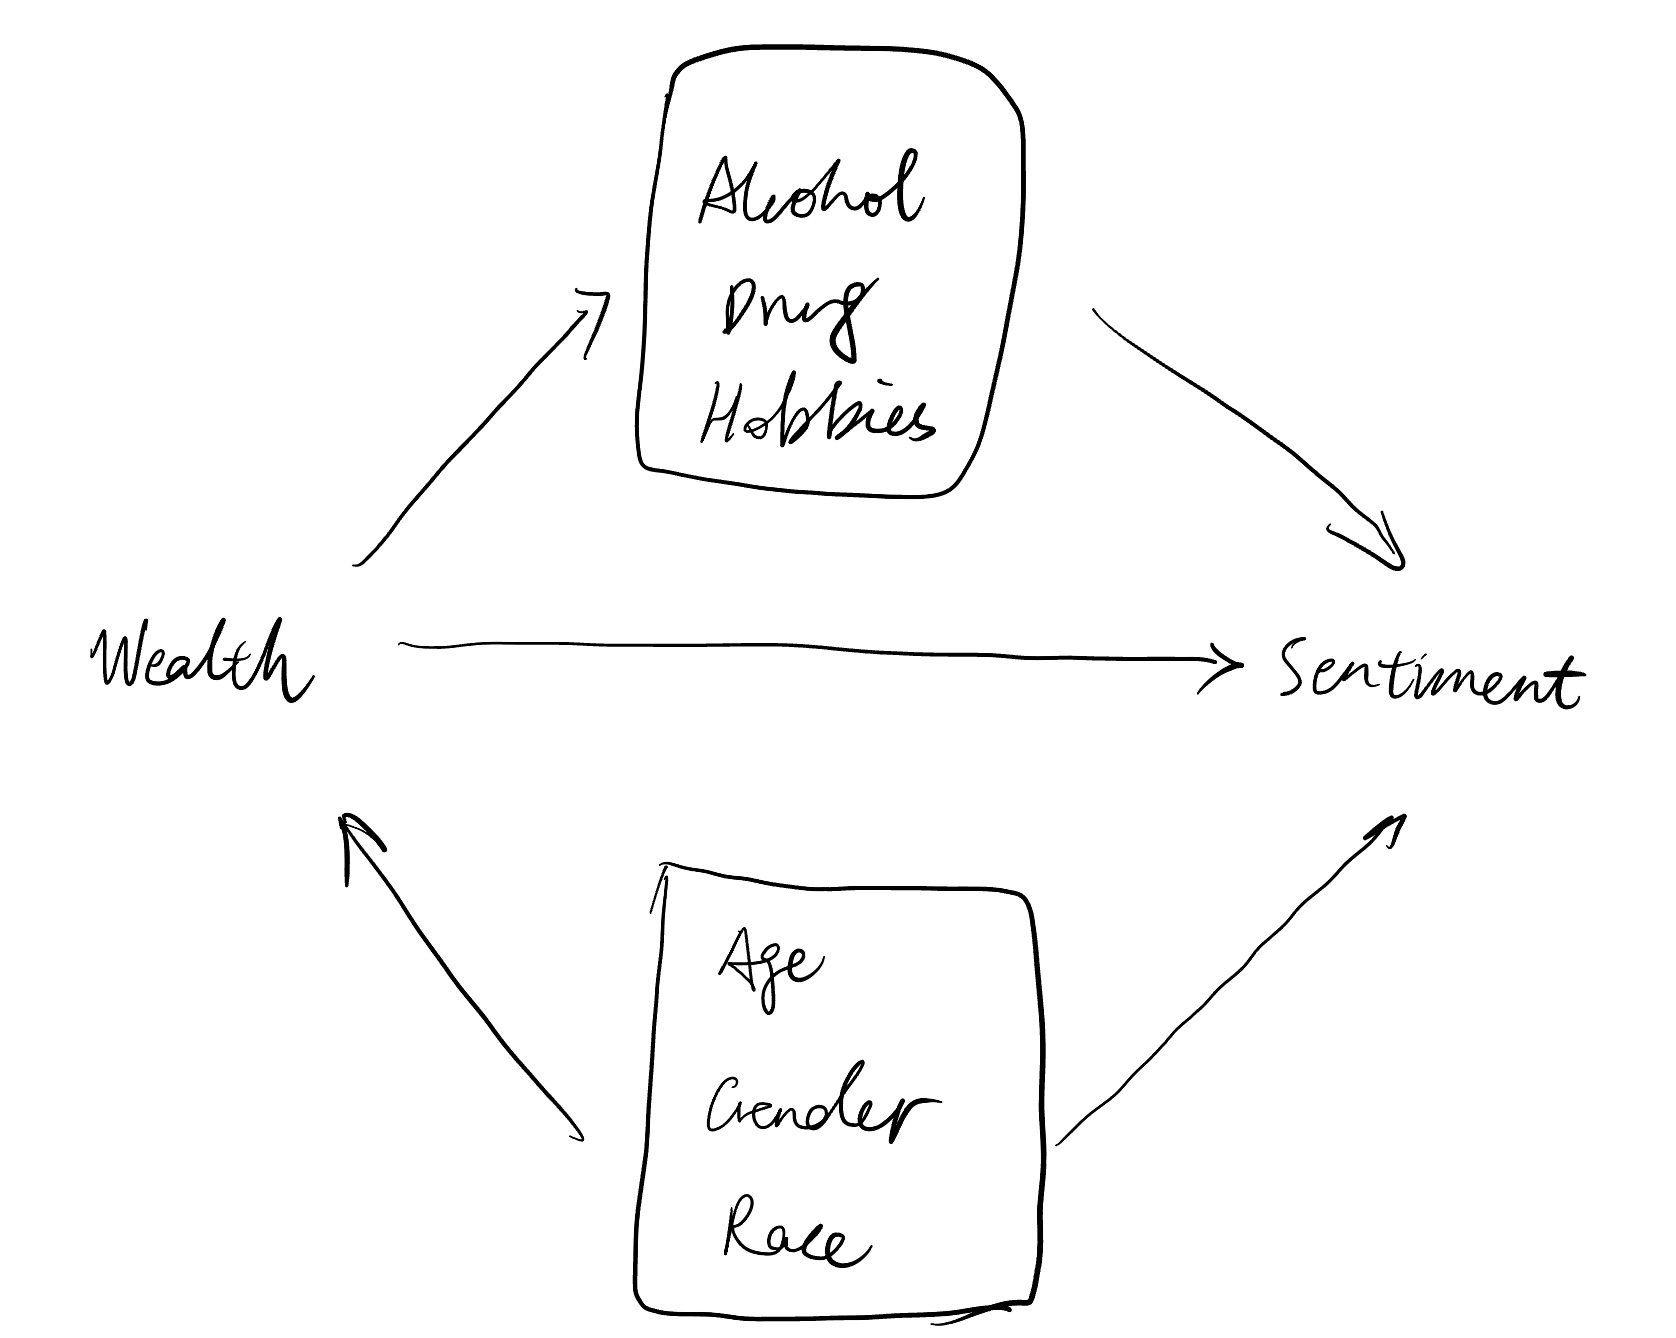

For the baseline model, we will just do a OLS regression. Y is the sentiment, X is the wealth. And for controls, we will add the demographic infos of the users age gender race...... Lets go!

In [ ]:
!pip install -U git+https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

  Cloning https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git to /tmp/pip-req-build-kk5vm48n
  Running command git clone --filter=blob:none --quiet https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git /tmp/pip-req-build-kk5vm48n
  Resolved https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git to commit b17a265d3b8253424e5b38872457f7437909a65d
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.8/76.8 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━

In [ ]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

#All these packages need to be installed from pip
import os #For managing the operating system
import requests #For getting files
import zipfile #For managing zips
import numpy as np #For arrays
import scipy as sp #For some stats
import pandas as pd #Gives us DataFrames
import numpy as np #Math and matrices
import matplotlib.pyplot as plt #For graphics

# statsmodels is a popular Python statistics package
import statsmodels.api as sm
# Let's also import its graphics module
import statsmodels.graphics.api as smg
# And the mediation module
from statsmodels.stats.mediation import Mediation

# Pipelines to add text-based quantiative variables for regressions
from transformers import pipeline

# We have a lot of features, so let's set Pandas to show all of them.
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Colab Notebooks')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_excel('../data/dateappdata/merged_okcupid_profiles.xlsx')

In [ ]:
def clean_text(text):
    if isinstance(text, float):
        text = str(text) # convert float to string
    text = text.replace('\n', ' ') # remove newline
    text = text.replace('\r', ' ') # remove carriage return
    text = text.replace('\t', ' ') # remove tab
    text = text.replace('  ', ' ') # remove double spaces
    text = text.replace('\#', ' ') # remove \#, which we used as a separator
    text = text.replace('  ', ' ') # remove double spaces
    return text

# Now we will apply the function to the "Ideal Type" column
df['Merged_Column'] = df['Merged_Column'].apply(clean_text)

In [ ]:
df.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks,About Me,Occupation Intro,Good At,Physical Appearance,Hobby,Important Things,Reflection,Social Style,Secret,Ideal Type,Merged_Column
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...,about me: i would love to think that i was som...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,70,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (...",i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN,i am a chef: this is what that means. 1. i am ...
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,68,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,has cats,NaN,pisces but it doesn&rsquo;t matter,no,"english, french, c++","i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...","i'm not ashamed of much, but writing public te..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,71,20000,student,2012-06-28-14-22,"berkeley, california",doesn't want kids,likes cats,NaN,pisces,no,"english, german (poorly)",i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,i work in a library and go to school. . . read...
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,likes dogs and likes cats,NaN,aquarius,no,english,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN,hey how's it going? currently vague on the pro...


In [ ]:
columns_to_keep = ['Merged_Column', 'age', 'sex', 'status', 'orientation','body_type', 'smokes','drugs','ethnicity', 'income', 'ethnicity']
df = df.dropna(subset=columns_to_keep)
# Drop the column where income = -1
df = df[df['income'] != -1]
df.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks,About Me,Occupation Intro,Good At,Physical Appearance,Hobby,Important Things,Reflection,Social Style,Secret,Ideal Type,Merged_Column
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,70,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (...",i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN,i am a chef: this is what that means. 1. i am ...
11,28,seeing someone,m,straight,average,mostly anything,socially,never,graduated from college/university,white,72,40000,banking / financial / real estate,2012-05-22-17-05,"daly city, california",NaN,likes cats,christianity and very serious about it,leo but it doesn&rsquo;t matter,no,"english (fluently), sign language (poorly)","i was born in wisconsin, grew up in iowa, and ...",i'm currently the youngest member on an intern...,i'm really good at a little bit of everything....,"the way i dress. some days it's hats, other da...",books = yes. avid reader. moves = eternal suns...,"guitar - even if i don't play it all the time,...",a little bit of everything. but mostly social ...,hanging out with a small group of friends--sta...,i'm picky when it comes to dating. i know what...,"if you know who you are, who you want, where y...","i was born in wisconsin, grew up in iowa, and ..."
13,30,single,f,straight,skinny,mostly anything,socially,never,graduated from high school,white,66,30000,sales / marketing / biz dev,2012-06-13-16-06,"san francisco, california",NaN,has dogs and likes cats,christianity but not too serious about it,NaN,no,english,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
14,29,single,f,straight,thin,mostly anything,socially,never,working on college/university,"hispanic / latin, white",62,50000,other,2012-06-29-08-55,"san leandro, california","doesn't have kids, but wants them",likes dogs and has cats,catholicism,taurus,no,english,NaN,i have an awesome career working as a senior m...,listening. helping others. being patient. comm...,"well, i get the most compliments on my butt, s...",books: my all-time favorite book is george orw...,1. my family 2. italian or mexican food 3. my ...,"to be honest, i spend way too much time thinki...",unwinding from my work week. hanging out with ...,"hmmm...not sure if i want to admit this, but p...",...you genuinely think we'd be a good match.,i have an awesome career working as a senior m...
66,22,single,m,straight,athletic,mostly anything,rarely,never,working on college/university,asian,65,20000,education / academia,2012-06-30-00-02,"san jose, california",NaN,NaN,buddhism and laughing about it,virgo but it doesn&rsquo;t matter,no,english (fluently),it will be way too boring to just reveal yours...,work+school,making bad jokes and being sarcastic,NaN,"i like christopher nolan movies,,,and amelie",cetaphil face wash phone internet family friends,my life goals and a career,NaN,NaN,just say hi..i dont bite,it will be way too boring to just reveal yours...


In [ ]:
# Now we turn the df['Ideal Type'] column into a list
Merged_Column = df['Merged_Column'].tolist()
# Since our sample sise is too large, we will only use the first 1000 rows
Merged_Column = Merged_Column[:1000]
df_1000 = df[:1000]

In [ ]:
def replace_ethnicity(value):
    if value not in ['white']:
        return 'non-white'
    else:
        return value

# 在 'Ethnicity' 列上应用函数
df_1000['Ethnicity_Replace'] = df_1000['ethnicity'].apply(replace_ethnicity)

<ipython-input-8-4e296b192a37>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1000['Ethnicity_Replace'] = df_1000['ethnicity'].apply(replace_ethnicity)


In [ ]:
# Now lets deal with other variables
text_mapping = {
    'm' : 0,
    'f' : 1
}

df_1000['sex_num'] = df_1000['sex'].map(text_mapping)

text_mapping = {
    'no' : 0,
    'sometimes' : 1,
    'trying to quit' : 2,
    'when drinking' : 3,
    'yes' : 4
}

df_1000['smokes_num'] = df_1000['smokes'].map(text_mapping)

text_mapping = {
    'never' : 0,
    'sometimes' : 1,
    'often' : 2
}

df_1000['drugs_num'] = df_1000['drugs'].map(text_mapping)

text_mapping = {
    'straight' : 0,
    'bisexual' : 1,
    'gay' : 2
}

df_1000['orientation_num'] = df_1000['orientation'].map(text_mapping)

text_mapping = {
    'white' : 0,
    'non-white' : 1,
}

df_1000['ethnicity_num'] = df_1000['Ethnicity_Replace'].map(text_mapping)




<ipython-input-9-0424761e0347>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1000['sex_num'] = df_1000['sex'].map(text_mapping)
<ipython-input-9-0424761e0347>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1000['smokes_num'] = df_1000['smokes'].map(text_mapping)
<ipython-input-9-0424761e0347>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [ ]:
!pip install transformers

In [ ]:
1

1

In [ ]:
# Now lets use BERT to train the model.
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader
from tqdm import tqdm
import pandas as pd

# 加载预训练的BERT模型和tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)  # 这里假设是二分类

# 将DataFrame转换为PyTorch Dataset
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, texts, tokenizer, max_len):
        self.texts = texts
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        inputs = self.tokenizer(text, truncation=True, padding='max_length', max_length=self.max_len, return_tensors='pt')
        return {
            'input_ids': inputs['input_ids'].flatten(),
            'attention_mask': inputs['attention_mask'].flatten()
        }

# 定义评分函数
def sentiment_score(text):
    model.eval()
    with torch.no_grad():
        inputs = tokenizer(text, return_tensors='pt')
        outputs = model(**inputs)
        logits = outputs.logits
        probabilities = torch.softmax(logits, dim=1)
        score = probabilities[:, 1].item()  # 获取正向情绪的概率
        return score

# 设置最大长度和批量大小
max_len = 128
batch_size = 8

# 创建Dataset和DataLoader
df_1000.reset_index(drop=True, inplace=True)
dataset = SentimentDataset(df_1000['Merged_Column'], tokenizer, max_len)
dataloader = DataLoader(dataset, batch_size=batch_size)

# 遍历DataLoader并进行情感分析
sentiment_scores = []
for batch in tqdm(dataloader):
    input_ids = batch['input_ids'].to(model.device)
    attention_mask = batch['attention_mask'].to(model.device)
    outputs = model(input_ids, attention_mask=attention_mask)
    logits = outputs.logits
    probabilities = torch.softmax(logits, dim=1)
    scores = probabilities[:, 1].tolist()  # 获取正向情绪的概率
    sentiment_scores.extend(scores)

# 将情感分数添加到DataFrame中
df_1000['Sentiment Score'] = sentiment_scores


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 125/125 [08:29<00:00,  4.07s/it]
<ipython-input-11-6e087f25cdcd>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1000['Sentiment Score'] = sentiment_scores


In [ ]:
# 将 'income' 列转换为 float
df_1000['income'] = df_1000['income'].astype(float)

# 将 'age' 列转换为 float
df_1000['age'] = df_1000['age'].astype(float)


<ipython-input-12-4ed81e9b6560>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1000['income'] = df_1000['income'].astype(float)
<ipython-input-12-4ed81e9b6560>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1000['age'] = df_1000['age'].astype(float)


In [ ]:
# Fantastic! Now we are down with the data preprocessing!
# Let's conduct regression!

y = df_1000['Sentiment Score']
X_cols = ['income','sex_num','orientation_num','ethnicity_num','age']
X = sm.add_constant(df_1000[X_cols])

lm1 = sm.OLS(y,X).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Sentiment Score   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.562
Date:                Sun, 18 Feb 2024   Prob (F-statistic):              0.168
Time:                        20:17:16   Log-Likelihood:                 3085.6
No. Observations:                1000   AIC:                            -6159.
Df Residuals:                     994   BIC:                            -6130.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1991      0.001    148.843      0.000       0.196       0.202
income           2.328e-11   1.87e-09      0.012      0.990   -3.64e-09    3.69e-09
sex_num            -0.0005      0.001     -0.643      0.520      -0.002       0.001
orientation_num    -0.0003      0.001     -0.514      0.607      -0.002       0.001
ethnicity_num       0.0015      0.001      2.095      0.036    9.67e-05       0.003
age              6.933e-05   3.59e-05      1.933      0.054   -1.06e-06       0.000
==============================================================================
Omnibus:                     1007.599   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           126186.578
Skew:                           4.347   Prob(JB):                         0.00
Kurtosis:                      57.341   Cond. No.                     8.40e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

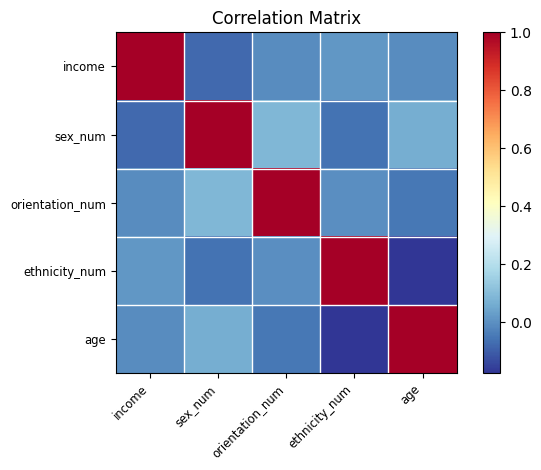

In [ ]:
corr_matrix = np.corrcoef(df_1000[X_cols].T)
smg.plot_corr(corr_matrix, xnames=X_cols)
plt.show()

OK lets see the result...... First of all, the R^2 is very low, meaning the regression can not explain the variation of sentiment very well. That make sense since sentiment is very complicated.

And then lets look at the income. It is very insiginificant and the P value is 0.117, so we can not reject it is equal to 0. So at least in this very naive model, income doesn't pay much role in sentiment.


Stretch: For more advanced model, I think we can use matching techniques. Matching users demographic imformation and provide more accurate regression result.

## <font color="red">*Exercise 3*</font>

<font color="red">Propose a measure you could generate to fill in or improve upon the simple causal model you proposed above and how you would split the data (e.g., a % of your main data, a separate-but-informative dataset). You do not have to produce the measure.
    
<font color="red">***Stretch*** (not required): Produce the measure and integrate it into your statistical analysis. This could be a great approach for your final project!

There was a problem with the previous regression analysis, namely that our dependent variable Y represented specific wage amounts, such as annual incomes of 20,000, 70,000, or 80,000, etc. It's difficult for these specific amounts to have a direct correlation with people's emotions (for example, there might not be a significant difference between someone earning 75,000 and someone earning 80,000 annually), so the original measurement wasn't particularly effective.

For the new measurement, we can distinguish between having a "wealthy signal" and not having one. Having a "wealthy signal" refers to mentioning activities like golfing, horseback riding, wine tasting in one's bio, or using high-status terms like banker, investor, etc. Not having a "wealthy signal" means the absence of these high-status terms. Thus, creating a dummy variable may be more appropriate.


In response to the endogeneity issue raised in the notebook7, I personally believe that even if we change the measurement to "wealthy signal," it would not introduce endogeneity to the model, or at least the method mentioned earlier of training the model on another similar dataset would not alleviate this endogeneity issue.

The reason is that while the "wealthy signal" is derived from bios text, our BERT Sentiment classification was not trained on our dating app data but instead utilized a pre-trained model from other data. Therefore, in terms of data source, we have already mitigated the potential for endogeneity.

Hence, when splitting the dataset for training, we can allocate the data randomly with a ratio of 70% for training and 30% for testing, or alternatively, with a ratio of 70% for training, 20% for testing, and 10% for validation.

## <font color="red">*Exercise 4*</font>

<font color="red">Propose a mediation model related to the simple causal model you proposed above (ideally on the dataset you're using for your final project). If you have measures for each variable in the model, run the analysis: You can just copy the "Mediation analysis" cell above and replace with your variables. If you do not have measures, do not run the analysis, but be clear as to the effect(s) you would like to estimate and the research design you would use to test them.

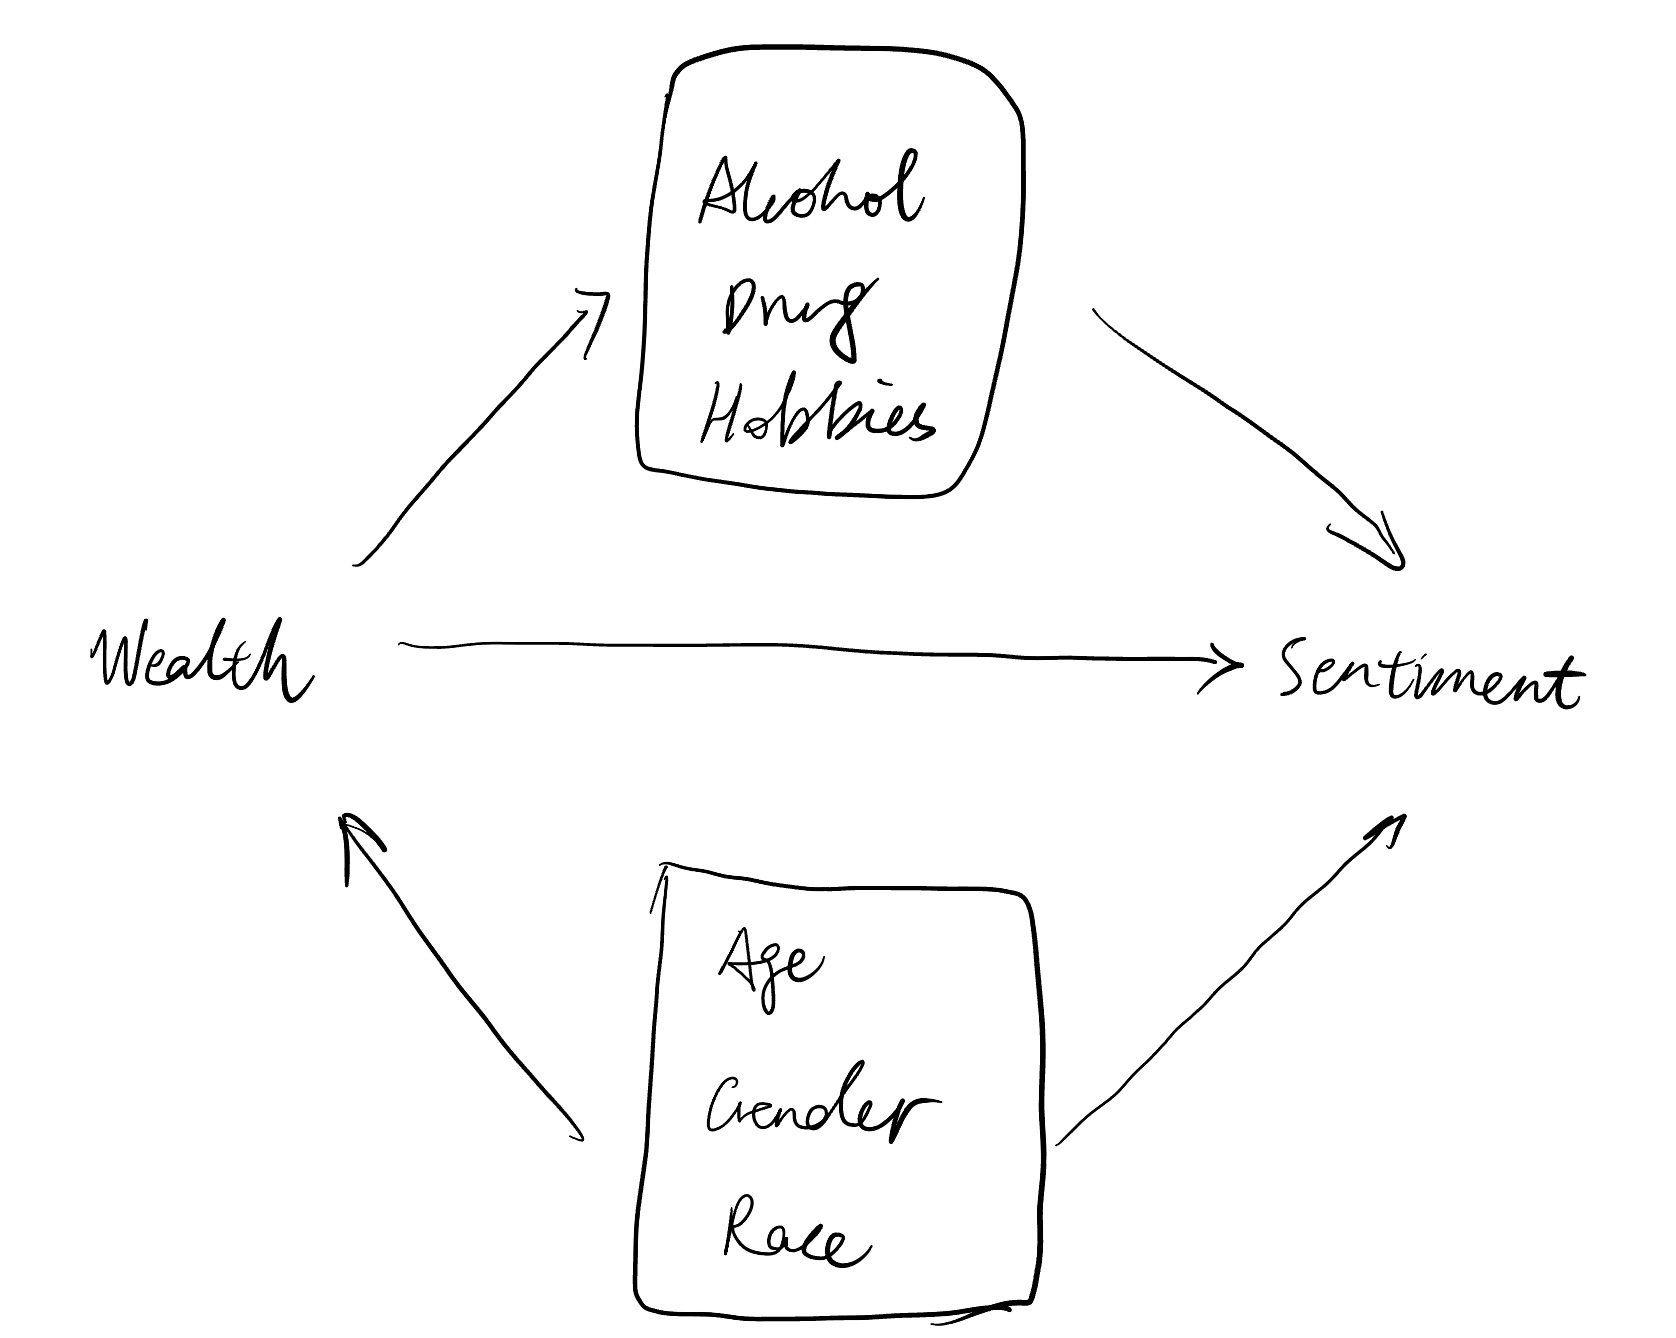

As I draw the graph above, Alcoho, Smoke, Drug and hobbies may be mediators. Since we already have smoke and drug. Lets take a look!

In [ ]:
# Mediation analysis
y = df_1000['drugs_num']
X_cols = ['income']
X = sm.add_constant(df_1000[X_cols])
mediator_model = sm.OLS(y,X)

# For the second step of the mediation model, we can add in other predictors.
y = df_1000['Sentiment Score']
X_cols = ['income','sex_num','orientation_num','ethnicity_num','age','drugs_num']
X = sm.add_constant(df_1000[X_cols])
outcome_model = sm.OLS(y,X)

med = Mediation(outcome_model=outcome_model, mediator_model=mediator_model,
                exposure='income', mediator='drugs_num').fit()
med.summary()

,Estimate,Lower CI bound,Upper CI bound,P-value
ACME (control),-5.359256e-07,-3.740966e-05,3.446803e-05,0.950
ACME (treated),-5.359256e-07,-3.740966e-05,3.446803e-05,0.950
ADE (control),6.966226e-11,-3.666184e-09,3.666486e-09,0.938
ADE (treated),6.966226e-11,-3.666184e-09,3.666486e-09,0.938
Total effect,-5.358559e-07,-3.740749e-05,3.446597e-05,0.950
Prop. mediated (control),9.999943e-01,9.948865e-01,1.005891e+00,0.000
Prop. mediated (treated),9.999943e-01,9.948865e-01,1.005891e+00,0.000
ACME (average),-5.359256e-07,-3.740966e-05,3.446803e-05,0.950
ADE (average),6.966226e-11,-3.666184e-09,3.666486e-09,0.938
Prop. mediated (average),9.999943e-01,9.948865e-01,1.005891e+00,0.000


In [ ]:
# Mediation analysis
y = df_1000['smokes_num']
X_cols = ['income']
X = sm.add_constant(df_1000[X_cols])
mediator_model = sm.OLS(y,X)

# For the second step of the mediation model, we can add in other predictors.
y = df_1000['Sentiment Score']
X_cols = ['income','sex_num','orientation_num','ethnicity_num','age','smokes_num']
X = sm.add_constant(df_1000[X_cols])
outcome_model = sm.OLS(y,X)

med = Mediation(outcome_model=outcome_model, mediator_model=mediator_model,
                exposure='income', mediator='smokes_num').fit()
med.summary()

,Estimate,Lower CI bound,Upper CI bound,P-value
ACME (control),-1.073402e-06,-9.467028e-05,8.910941e-05,0.966
ACME (treated),-1.073402e-06,-9.467028e-05,8.910941e-05,0.966
ADE (control),-6.021344e-11,-3.572807e-09,3.344476e-09,0.966
ADE (treated),-6.021344e-11,-3.572807e-09,3.344476e-09,0.966
Total effect,-1.073462e-06,-9.467027e-05,8.910953e-05,0.966
Prop. mediated (control),9.999991e-01,9.994231e-01,1.001070e+00,0.000
Prop. mediated (treated),9.999991e-01,9.994231e-01,1.001070e+00,0.000
ACME (average),-1.073402e-06,-9.467028e-05,8.910941e-05,0.966
ADE (average),-6.021344e-11,-3.572807e-09,3.344476e-09,0.966
Prop. mediated (average),9.999991e-01,9.994231e-01,1.001070e+00,0.000


Sadly, the ADE and ACME are all significantly small. No matter it is drug or smoke. It make sense since in exercise 2 we already shows that the link between income and sentiment is weak. So ADE and ACME will likely be weak too in the mediator model.


## <font color="red">*Exercise 5*</font>

<font color="red">Pick one other paper on causal inference with text from the ["Papers about Causal Inference and Language
" GitHub repository](https://github.com/causaltext/causal-text-papers). Write at least three sentences summarizing the paper and its logic of design in your own words.
    
<font color="red">***Stretch*** (not required): Skim a few more papers. The causal world is your textual oyster!

I am going to summarize "Predicting Sales from the Language of Product Descriptions," authored by Reid Pryzant, Young-joo Chung, and Dan Jurafsky.

Summary: The research investigates how narrative elements in product descriptions influence consumer purchasing decisions, aiming to identify predictive textual features for sales performance. Methodologically, over 90,000 product descriptions and sales records from Rakuten were collected. Through feature mining techniques, including Odds Ratio, Mutual Information, Lasso Regularization, and a novel neural network architecture (RNN+/-GF), predictive words associated with high sales volumes were identified. The RNN+/-GF model, utilizing an attention mechanism and adversarial training, outperformed traditional methods in selecting predictive features while mitigating brand and price influences. Findings reveal that products described with authority, politeness, informativeness, and seasonality appeal more to consumers. This research offers practical implications for e-commerce merchants, enabling them to optimize product descriptions strategically to enhance sales performance and consumer satisfaction.

Logic of Design:
The paper tackles the Learning to Rank (LTR) problem in information retrieval, aiming to enhance ranking model performance, particularly on large-scale datasets. It introduces the use of diverse proxies like click-through rates and relevance scores, integrating them with neural network models, specifically fully connected neural networks. Employing a multi-task learning framework enables simultaneous learning for multiple proxies, enhancing efficiency and generalization. Through end-to-end training, the model optimizes ranking task representation directly from raw data. By leveraging heterogeneous data and the flexibility of neural networks, the approach achieves a comprehensive understanding of user needs and content relevance. Experimental validation on multiple datasets demonstrates significant performance improvements over existing LTR methods, highlighting the efficacy and scalability of the proposed method.